# Lab Random variable distributions


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from scipy import stats



In [2]:
customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
def df_by_category(df):
    numerical_df = df.select_dtypes(np.number)
    categorical_df = df.select_dtypes(object)
    return categorical_df, numerical_df

categorical_df,numerical_df=df_by_category(customer_df)

In [4]:
#Get the numerical variables from our dataset.

numerical_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


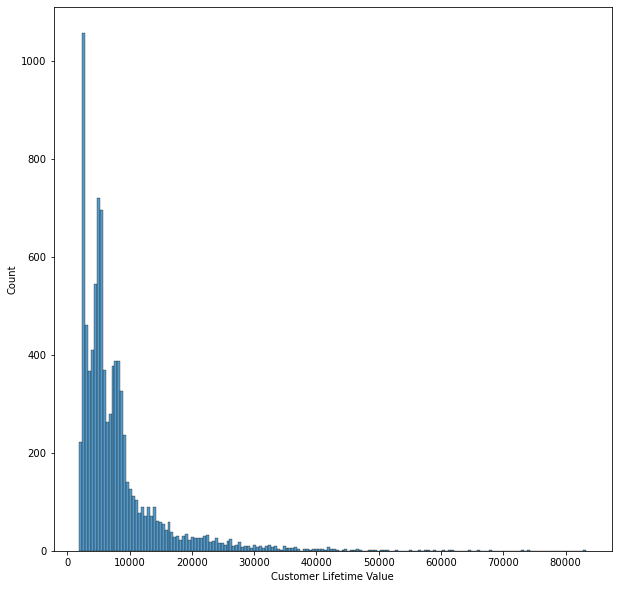

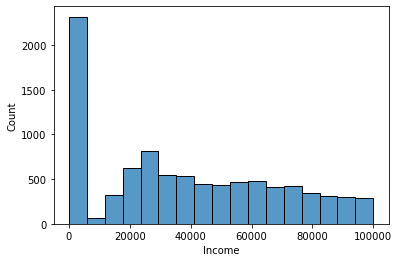

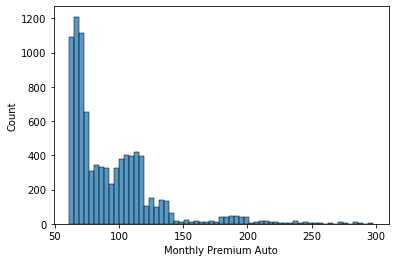

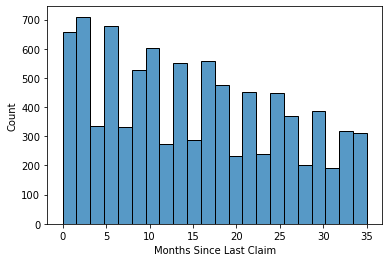

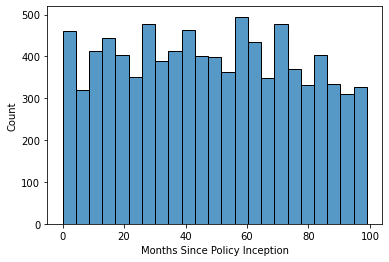

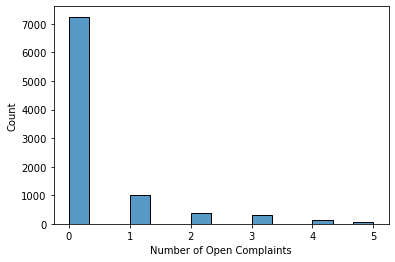

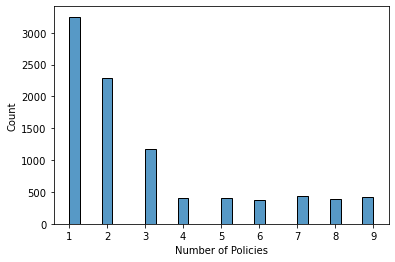

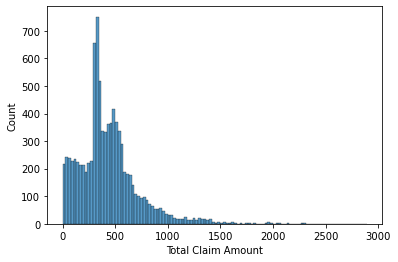

In [5]:
#Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.


def plot_barplot(df):
    fig = plt.subplots(figsize=(10,10))
    for col in df:
        sns.histplot(df[col])
        plt.show()

plot_barplot(numerical_df)

From the variable plots, it's possible to see that:
customer_lifetime_value, income, monthly_premium_auto, total_claim_amount follow an exponential distribution
number_of_policies, number_of_open_complaints, months_since_policy_inception, months_since_last_claim follows a discrete distribution


Text(0.5, 1.0, 'Box-Cox Transformation')

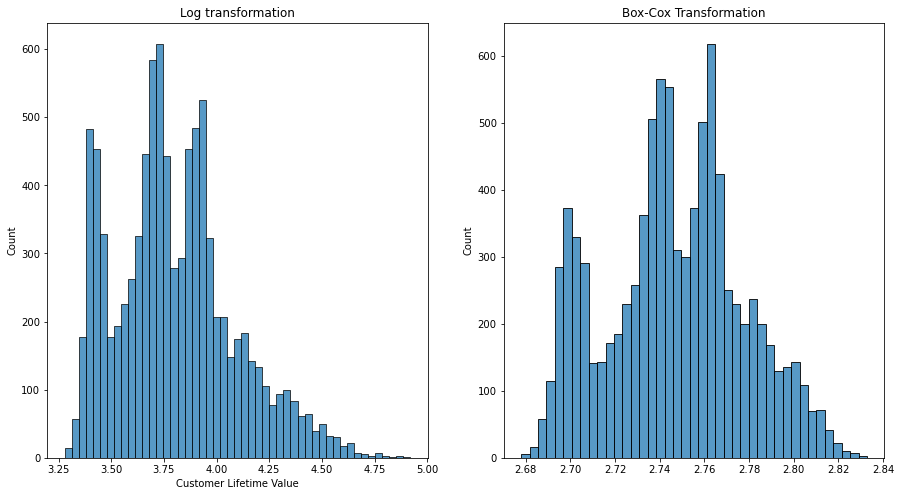

In [6]:
#Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

#Log tranformation: reduce range of 0 - 100000 to a range of 0-5
def log_transfom_clean1(x):
    x = np.log10(x) 
    if np.isfinite(x):
        return x
    else:
        return 0

#Log tranformation
numerical_df2 = numerical_df['Customer Lifetime Value'].apply(lambda x :log_transfom_clean1(x))

#Box-Cox tranformation
xt, lmbda = stats.boxcox(numerical_df['Customer Lifetime Value'])


#Plots
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(x=numerical_df2, ax=ax[0])
ax[0].set_title("Log transformation")

sns.histplot(x=xt, ax=ax[1])
ax[1].set_title("Box-Cox Transformation")

#Both transformations changed the distribution of the variable 'Customer Lifetime Value'


Text(0.5, 1.0, 'Log transformation')

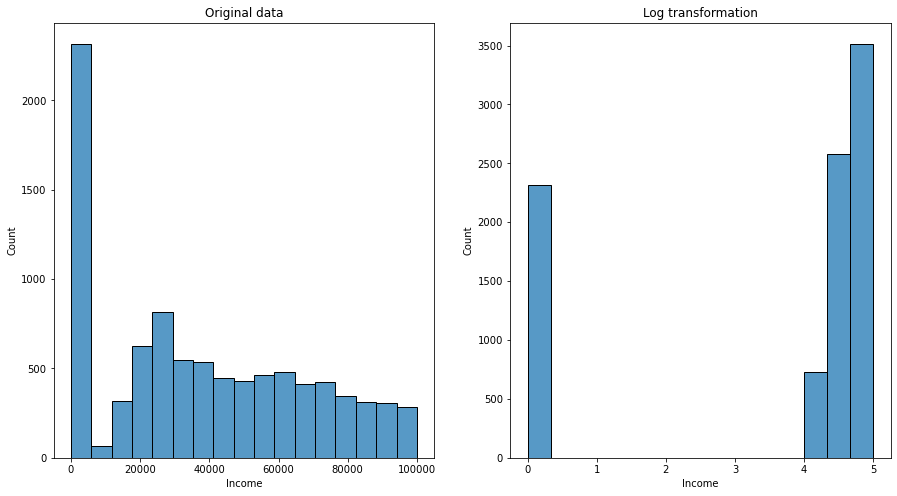

In [7]:
#Log tranformation
numerical_df2 = numerical_df['Income'].apply(lambda x :log_transfom_clean1(x))

#Box-Cox tranformation can't be applied in this category because it contains 0
#This transformation requires that the column must be postive
#xt, lmbda = stats.boxcox(numerical_df['Income'])


#Plot
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(x=numerical_df['Income'], ax=ax[0])
ax[0].set_title("Original data")

sns.histplot(x=numerical_df2, ax=ax[1])
ax[1].set_title("Log transformation")

Text(0.5, 1.0, 'Box-Cox Transformation')

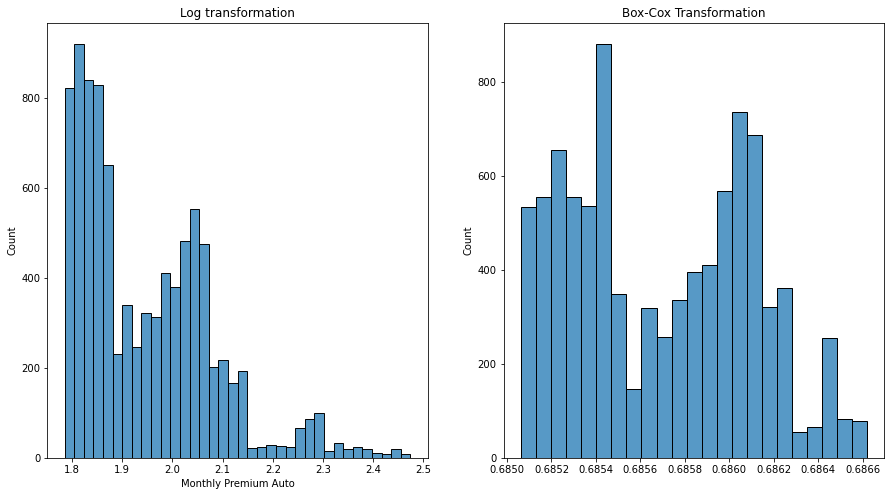

In [9]:
#Log tranformation
numerical_df2 = numerical_df['Monthly Premium Auto'].apply(lambda x :log_transfom_clean1(x))

#Box-Cox tranformation
xt, lmbda = stats.boxcox(numerical_df['Monthly Premium Auto'])


#Plots
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(x=numerical_df2, ax=ax[0])
ax[0].set_title("Log transformation")

sns.histplot(x=xt, ax=ax[1])
ax[1].set_title("Box-Cox Transformation")

#In this case Box-Cox transformation changed the distribution of this variable, removing the skewness

Text(0.5, 1.0, 'Box-Cox Transformation')

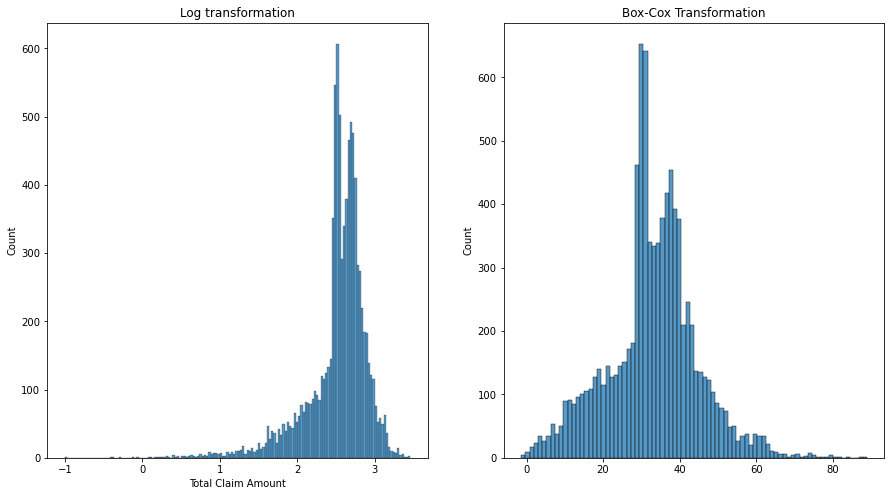

In [10]:
#Log tranformation
numerical_df2 = numerical_df['Total Claim Amount'].apply(lambda x :log_transfom_clean1(x))

#Box-Cox tranformation
xt, lmbda = stats.boxcox(numerical_df['Total Claim Amount'])


#Plots
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(x=numerical_df2, ax=ax[0])
ax[0].set_title("Log transformation")

sns.histplot(x=xt, ax=ax[1])
ax[1].set_title("Box-Cox Transformation")

#Applying log transformation in this variable results in a negative skewness, while the box-cox transformation returns a spike distribution.